Description

city - the name of the city where the property is located

type - type of the building

squareMeters - the size of the apartment in square meters

rooms - number of rooms in the apartment

floor / floorCount - the floor where the apartment is located and the total number of floors in the building

buildYear - the year when the building was built

latitude, longitude - geo coordinate of the property

centreDistance - distance from the city centre in km

poiCount - number of points of interest in 500m range from the apartment (schools, clinics, post offices, kindergartens, restaurants, colleges, pharmacies)

[poiName]Distance - distance to the nearest point of interest (schools, clinics, post offices, kindergartens, restaurants, colleges, pharmacies)

ownership - the type of property ownership

condition - the condition of the apartment

has[features] - whether the property has key features such as assigned parking space, balcony, elevator, security, storage room

price - offer price in Polish Zloty

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('apartments_pl_2023_08.csv')
data.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,f8524536d4b09a0c8ccc0197ec9d7bde,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,...,0.413,condominium,concreteSlab,NaN,yes,yes,yes,no,yes,415000
1,accbe77d4b360fea9735f138a50608dd,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,...,0.205,cooperative,concreteSlab,NaN,no,yes,yes,no,yes,395995
2,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,...,0.280,condominium,brick,NaN,no,no,no,no,no,565000
3,0a68cd14c44ec5140143ece75d739535,szczecin,tenement,87.60,3.0,2.0,3.0,NaN,53.435100,14.532900,...,0.087,condominium,brick,NaN,yes,yes,no,no,yes,640000
4,f66320e153c2441edc0fe293b54c8aeb,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,NaN,53.410278,14.503611,...,0.514,condominium,NaN,NaN,no,no,no,no,no,759000


# **********Tout d'abord, nous examinerons les données de notre dataset **


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18905 entries, 0 to 18904
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    18905 non-null  object 
 1   city                  18905 non-null  object 
 2   type                  14866 non-null  object 
 3   squareMeters          18905 non-null  float64
 4   rooms                 18905 non-null  float64
 5   floor                 15467 non-null  float64
 6   floorCount            18643 non-null  float64
 7   buildYear             15634 non-null  float64
 8   latitude              18905 non-null  float64
 9   longitude             18905 non-null  float64
 10  centreDistance        18905 non-null  float64
 11  poiCount              18905 non-null  float64
 12  schoolDistance        18891 non-null  float64
 13  clinicDistance        18817 non-null  float64
 14  postOfficeDistance    18880 non-null  float64
 15  kindergartenDistanc

In [ ]:
data.isnull().sum()

,0
id,0
city,0
type,4039
squareMeters,0
rooms,0
floor,3438
floorCount,262
buildYear,3271
latitude,0
longitude,0


In [ ]:
data.describe()

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price
count,18905.000000,18905.000000,15467.000000,18643.000000,15634.000000,18905.000000,18905.000000,18905.000000,18905.000000,18891.000000,18817.000000,18880.000000,18892.000000,18847.000000,18340.000000,18878.000000,1.890500e+04
mean,58.509976,2.676752,3.339820,5.279783,1984.551043,52.020411,19.516394,4.398444,20.099656,0.414897,1.002196,0.518748,0.371033,0.356646,1.460047,0.364134,6.925592e+05
std,21.060168,0.903619,2.549141,3.333666,33.767929,1.353998,1.769053,2.857387,23.513874,0.472782,0.913721,0.506783,0.452338,0.475884,1.102847,0.469334,3.443890e+05
min,25.000000,1.000000,1.000000,1.000000,1850.000000,49.979110,14.447127,0.020000,0.000000,0.004000,0.005000,0.001000,0.004000,0.001000,0.006000,0.003000,1.500000e+05
25%,44.200000,2.000000,2.000000,3.000000,1967.000000,51.109100,18.536220,2.070000,7.000000,0.175000,0.367000,0.237000,0.158000,0.118500,0.592000,0.145000,4.588000e+05
50%,54.400000,3.000000,3.000000,4.000000,1990.000000,52.193604,19.908944,4.010000,13.000000,0.288000,0.700000,0.387000,0.264000,0.235000,1.140000,0.239000,6.200000e+05
75%,68.200000,3.000000,4.000000,6.000000,2014.000000,52.412561,20.992010,6.180000,23.000000,0.466500,1.286000,0.621000,0.415000,0.417000,2.107000,0.405000,8.300000e+05
max,150.000000,6.000000,29.000000,29.000000,2023.000000,54.583210,23.207128,16.940000,208.000000,4.818000,4.996000,4.967000,4.960000,4.985000,4.998000,4.992000,2.500000e+06


# # **************Supprimer les données en double**************
**(we don't have duplicate data)**


In [ ]:
doublons = data[data.duplicated()]
print(doublons)

Empty DataFrame
Columns: [id, city, type, squareMeters, rooms, floor, floorCount, buildYear, latitude, longitude, centreDistance, poiCount, schoolDistance, clinicDistance, postOfficeDistance, kindergartenDistance, restaurantDistance, collegeDistance, pharmacyDistance, ownership, buildingMaterial, condition, hasParkingSpace, hasBalcony, hasElevator, hasSecurity, hasStorageRoom, price]
Index: []

[0 rows x 28 columns]


# #Remplir les colonnes qui contiennent des données manquantes.

In [ ]:
data['type']=data['type'].fillna('unknown')
data['floor']=data['floor'].fillna(data['floor'].mean())
data['floorCount']=data['floorCount'].fillna(data['floorCount'].mean())
data['buildYear']=data['buildYear'].fillna(data['buildYear'].mean())
data['schoolDistance']=data['schoolDistance'].fillna(data['schoolDistance'].mean())
data['clinicDistance']=data['clinicDistance'].fillna(data['clinicDistance'].mean())
data['kindergartenDistance']=data['kindergartenDistance'].fillna(data['kindergartenDistance'].mean())
data['postOfficeDistance']=data['postOfficeDistance'].fillna(data['postOfficeDistance'].mean())
data['restaurantDistance']=data['restaurantDistance'].fillna(data['restaurantDistance'].mean())
data['collegeDistance']=data['collegeDistance'].fillna(data['collegeDistance'].mean())
data['pharmacyDistance']=data['pharmacyDistance'].fillna(data['pharmacyDistance'].mean())
data['buildingMaterial']=data['buildingMaterial'].fillna('unknown')

In [ ]:
#Supprimer les colonnes de type 'object'
data.drop(['condition'],axis=1,inplace=True)

In [ ]:
#Créer une colonne qui indique la distance totale jusqu'au point d'intérêt le plus proche
data['point of interest']=data['schoolDistance']+data['clinicDistance']+data['kindergartenDistance']+data['restaurantDistance']+data['collegeDistance']+data['pharmacyDistance']+data['postOfficeDistance']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18905 entries, 0 to 18904
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    18905 non-null  object 
 1   city                  18905 non-null  object 
 2   type                  18905 non-null  object 
 3   squareMeters          18905 non-null  float64
 4   rooms                 18905 non-null  float64
 5   floor                 18905 non-null  float64
 6   floorCount            18905 non-null  float64
 7   buildYear             18905 non-null  float64
 8   latitude              18905 non-null  float64
 9   longitude             18905 non-null  float64
 10  centreDistance        18905 non-null  float64
 11  poiCount              18905 non-null  float64
 12  schoolDistance        18905 non-null  float64
 13  clinicDistance        18905 non-null  float64
 14  postOfficeDistance    18905 non-null  float64
 15  kindergartenDistanc

In [ ]:
#Pour la colonne 'haselevator', nous allons créer une fonction qui remplace de manière aléatoire
#si l'établissement a un ascenseur ou non
def remplace(x):
    liste = ['yes','no']
    return np.random.choice(liste) if pd.isna(x) else x
data['hasElevator']=data['hasElevator'].map(remplace)


In [ ]:
#Vérifions si toutes les colonnes sont remplies.
data.isnull().sum()

,0
id,0
city,0
type,0
squareMeters,0
rooms,0
floor,0
floorCount,0
buildYear,0
latitude,0
longitude,0


# data analysis

In [ ]:
type =  data["type"].value_counts()
print(type)

type
blockOfFlats         9089
unknown              4039
tenement             2895
apartmentBuilding    2882
Name: count, dtype: int64


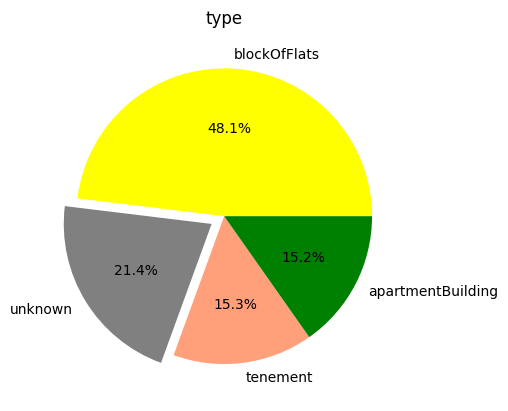

In [ ]:
#block of flats avec un percentage tres eleve => presque 50% de type block of flats
#tenement et apartement building avec le meme pourcentage
figure, axe = plt.subplots()
axe.set_title('type')
axe.pie(type,labels=['blockOfFlats','unknown','tenement','apartmentBuilding'],colors=['#FFFF00',"#808080",'#FFA07A','#008000'],autopct='%1.1f%%',
        explode=(0,0.1,0,0))
plt.show()

<Axes: xlabel='city', ylabel='count'>

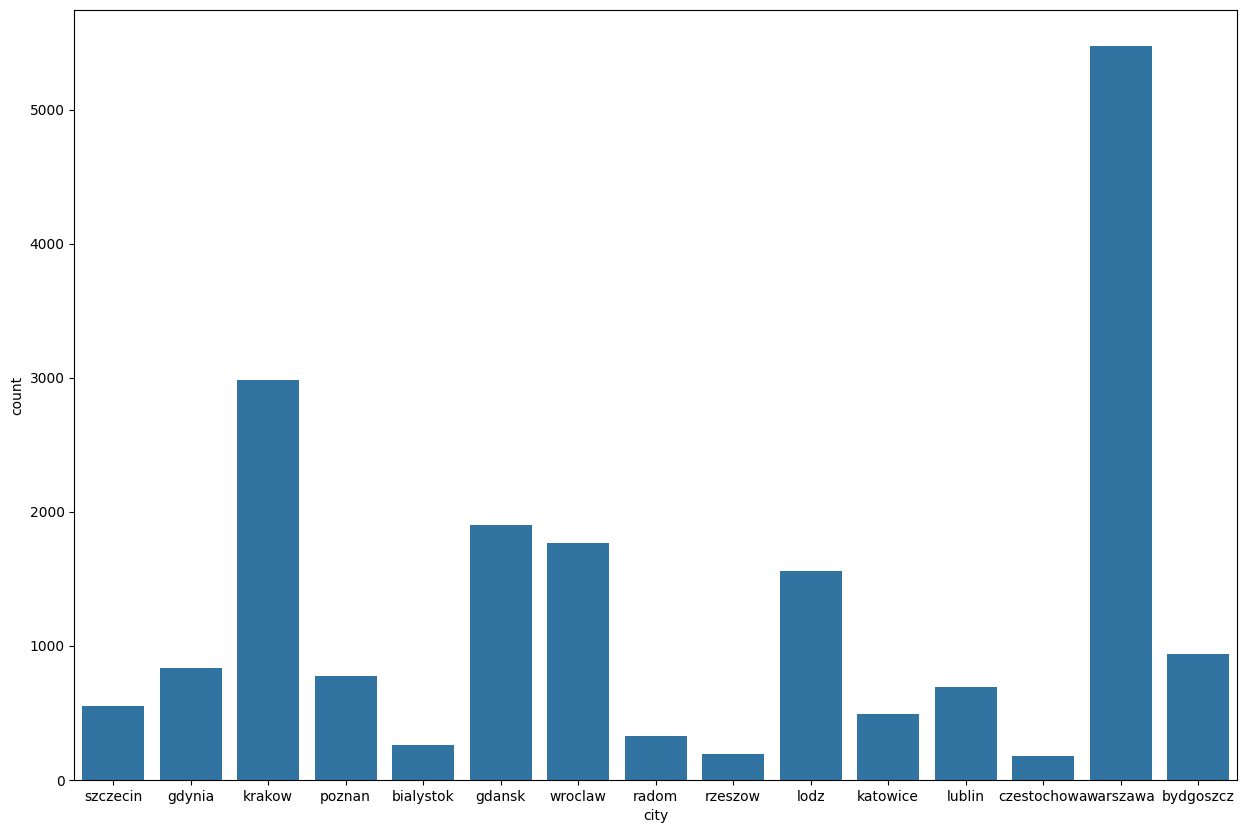

In [ ]:
#les deux city warszawa ET krakow sont les deux city qui contient plus d'appartement => apparament c'est les deux grands ville
plt.figure(figsize=(15, 10))
sns.countplot(data=data,x='city')

<Axes: xlabel='city', ylabel='count'>

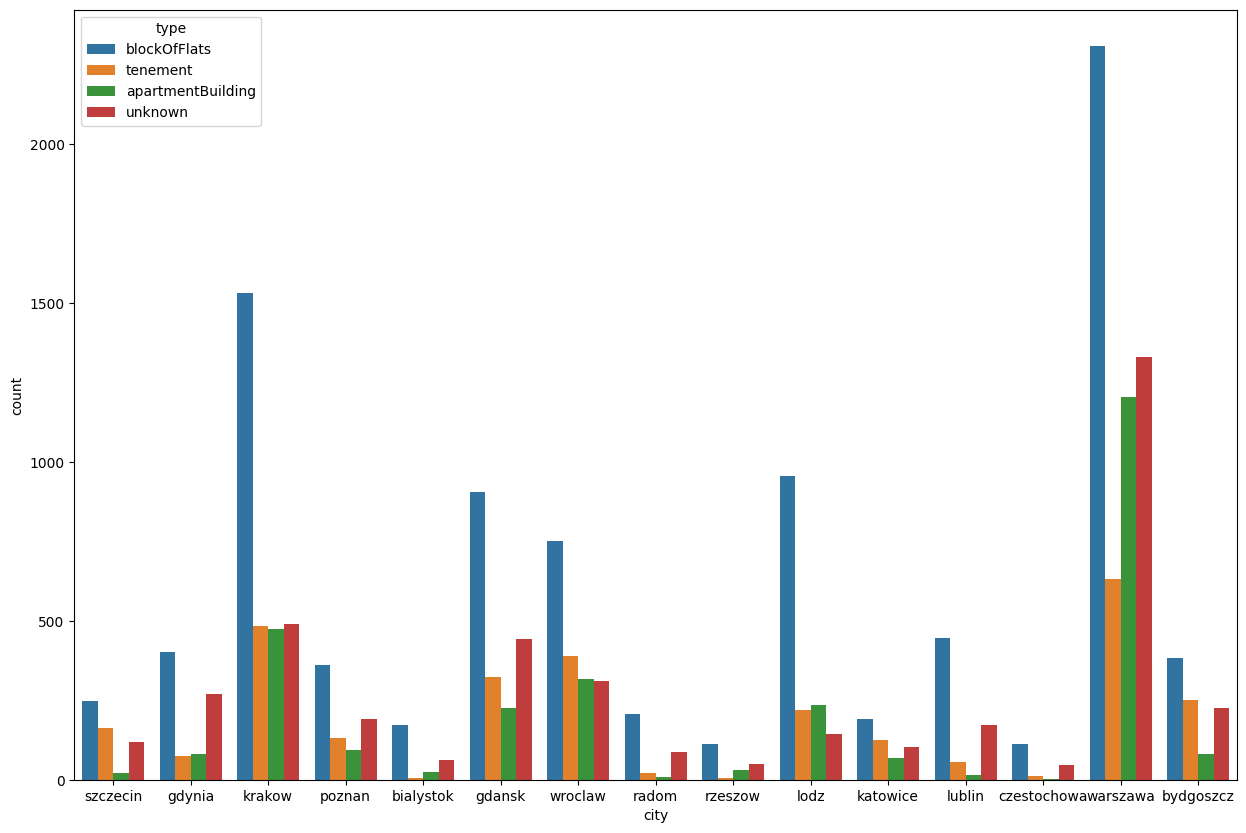

In [ ]:
#on remarque que pour chaque city on a le type block of flats est le plus trouver dans la city's , apparement il est beacoup demander
plt.figure(figsize=(15, 10))
sns.countplot(data=data,x="city",hue='type')

<Axes: xlabel='rooms', ylabel='count'>

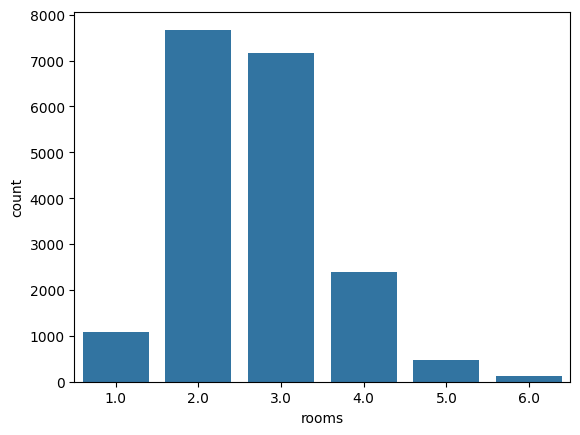

In [ ]:
# le nombre de piece le plus trouver dans les appartement sont 2 et 3 chambre
sns.countplot(data=data,x="rooms")

<Axes: xlabel='floor', ylabel='Count'>

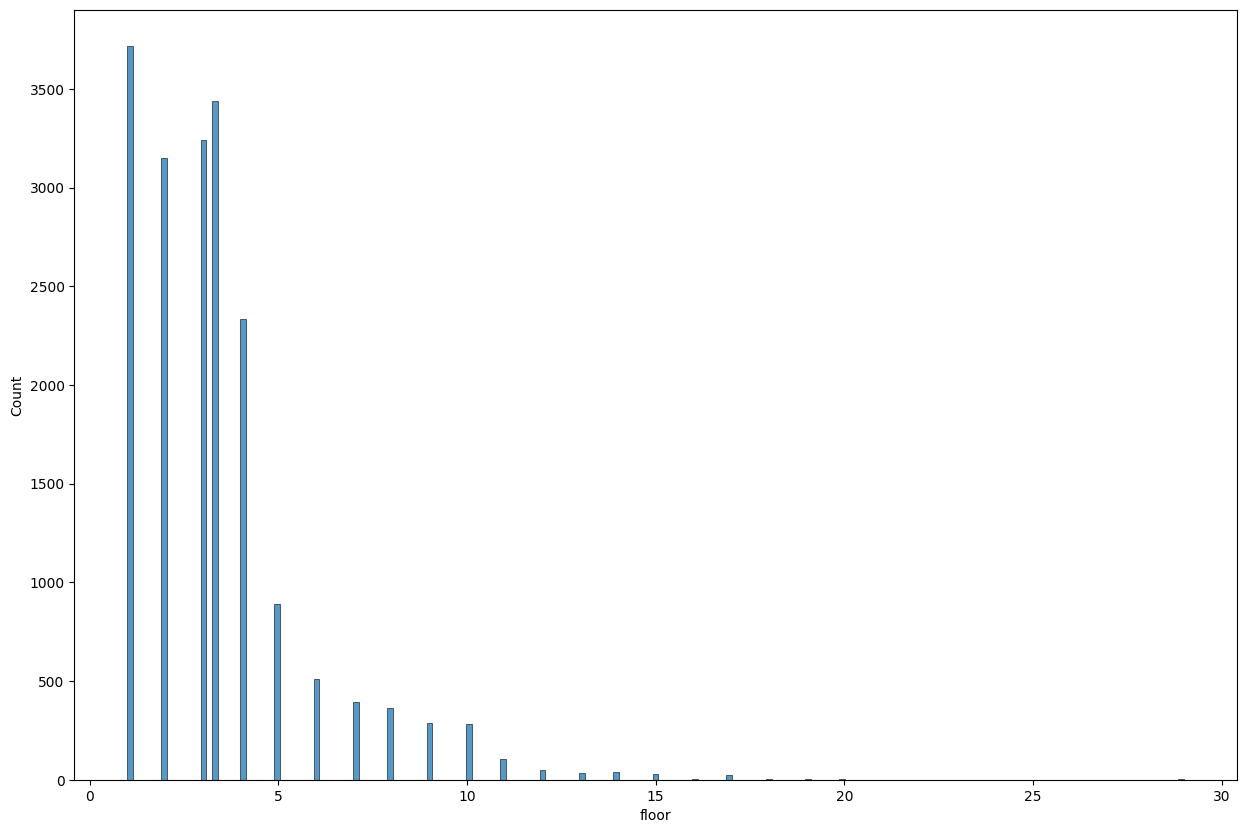

In [ ]:
#on remarque que la plupart des appartement sont entre le 1er et le 5em etage
plt.figure(figsize=(15, 10))
sns.histplot(data=data,x='floor')

<Axes: xlabel='squareMeters', ylabel='Count'>

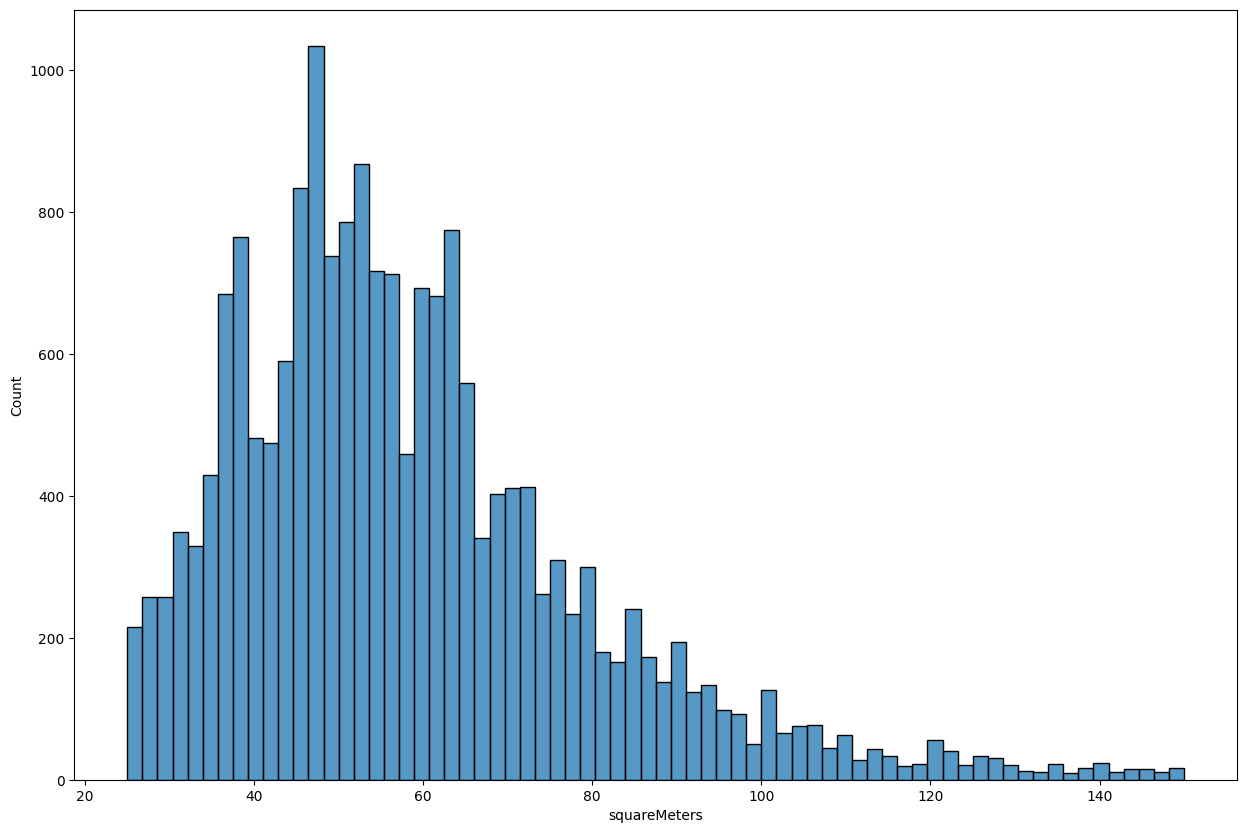

In [ ]:
# on peut constater que la moyenne de la surface est entre 35 et 65 metres
plt.figure(figsize=(15, 10))
sns.histplot(data=data,x='squareMeters')

<AxesSubplot:xlabel='price', ylabel='Count'>

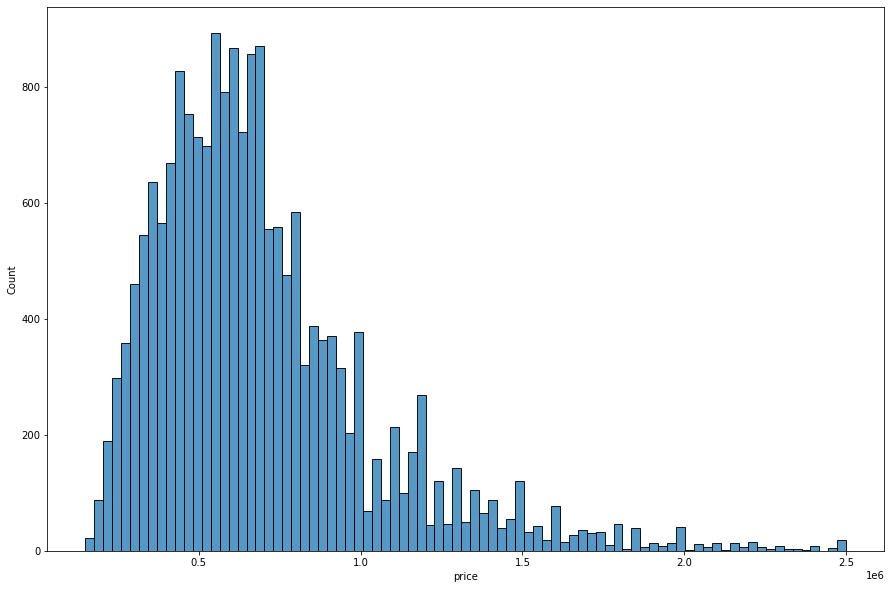

In [ ]:
plt.figure(figsize=(15, 10))
sns.histplot(data=data,x='price')

<Axes: xlabel='ownership', ylabel='count'>

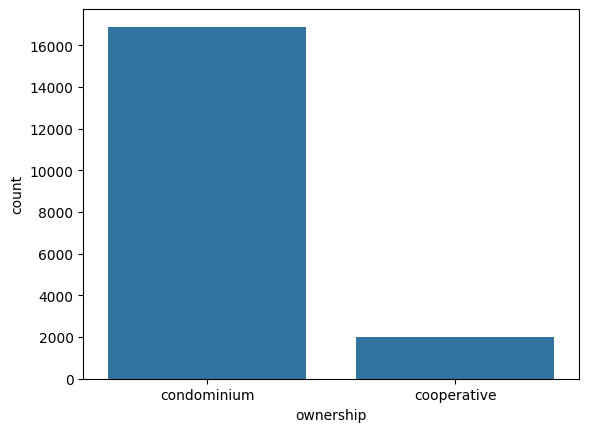

In [ ]:
#la plupart des ownership sont des condominium
sns.countplot(data=data,x="ownership")

<Axes: xlabel='squareMeters', ylabel='price'>

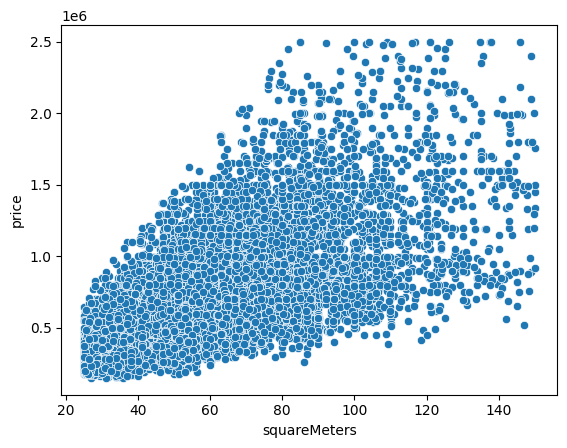

In [ ]:
#on remarque lorsque la surface augmante le prix augmante
sns.scatterplot(data=data,x='squareMeters',y='price')

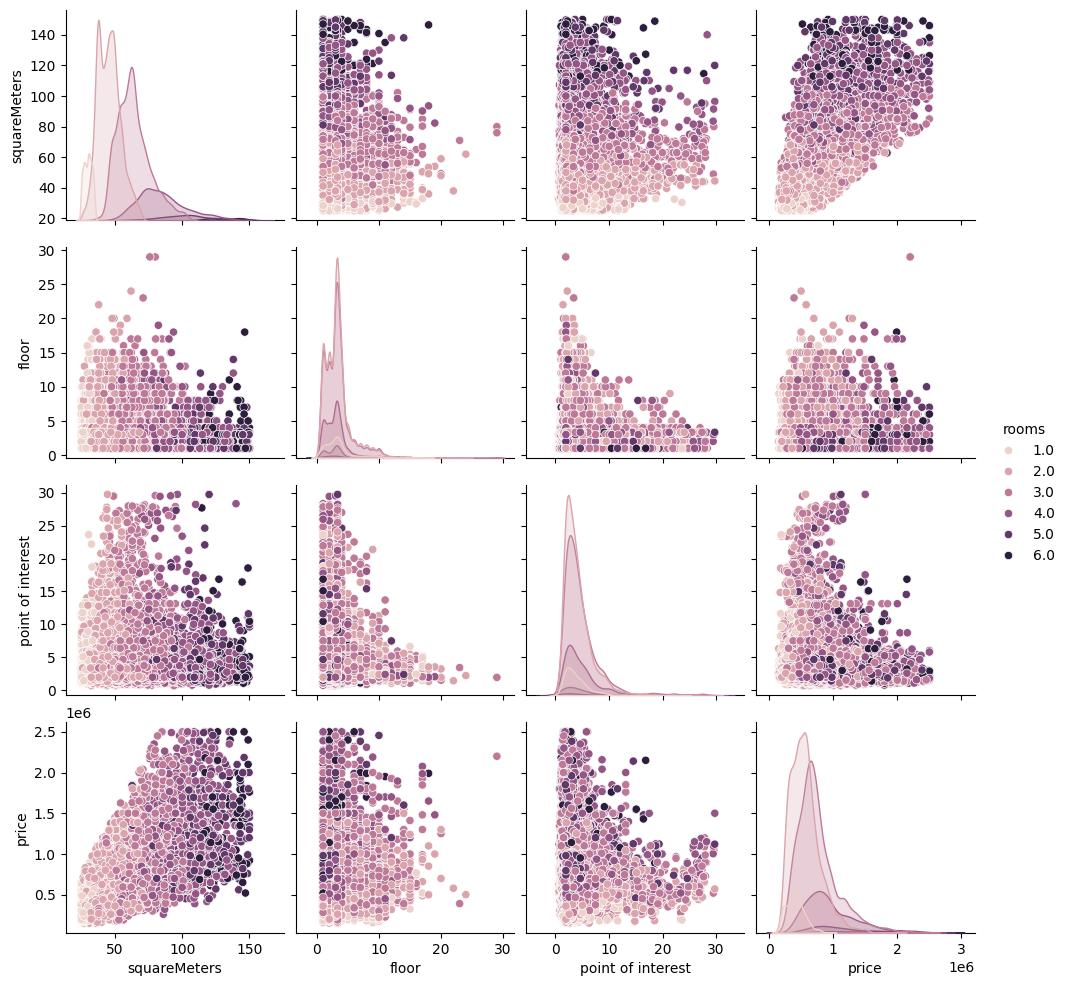

In [ ]:
import seaborn as sns
sns.pairplot(data[['squareMeters','floor','point of interest','rooms','price']],hue='rooms')

In [ ]:
#On remarque que lorsque la surface augmente, le prix augmente.
#On remarque que lorsque le point d'intérêt est de petite taille, le prix diminue.
#Le nombre de chambres augmente avec la surface.
#Les appartements avec un prix élevé ne dépassent généralement pas le 10e étage.

# Generate a one-hot encoding for the columns of type 'object'

In [ ]:
def hotencode(dataframe,colonne):
  ohe = pd.get_dummies(dataframe[colonne],prefix=colonne)
  ohe.head()
  dataframe = dataframe.join(ohe)
  return dataframe

In [ ]:
data = hotencode(data,"type")
data = hotencode(data,"city")
data = hotencode(data,"ownership")
data = hotencode(data,"buildingMaterial")
data.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,city_radom,city_rzeszow,city_szczecin,city_warszawa,city_wroclaw,ownership_condominium,ownership_cooperative,buildingMaterial_brick,buildingMaterial_concreteSlab,buildingMaterial_unknown
0,f8524536d4b09a0c8ccc0197ec9d7bde,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.000000,53.378933,14.625296,...,False,False,True,False,False,True,False,False,True,False
1,accbe77d4b360fea9735f138a50608dd,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,1984.551043,53.442692,14.559690,...,False,False,True,False,False,False,True,False,True,False
2,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,1984.551043,53.452222,14.553333,...,False,False,True,False,False,True,False,True,False,False
3,0a68cd14c44ec5140143ece75d739535,szczecin,tenement,87.60,3.0,2.0,3.0,1984.551043,53.435100,14.532900,...,False,False,True,False,False,True,False,True,False,False
4,f66320e153c2441edc0fe293b54c8aeb,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,1984.551043,53.410278,14.503611,...,False,False,True,False,False,True,False,False,False,True


In [ ]:
#label coding pour les colonnes
#('hasParkingSpace',"hasBalcony","hasElevator","hasSecurity","hasStorageRoom)
hasParkingSpace={
    'no':0,
    'yes':1
}
data['hasParkingSpace']=data['hasParkingSpace'].map(hasParkingSpace)

In [ ]:
hasBalcony={
    'no':0,
    'yes':1
}
hasElevator={
    'no':0,
    'yes':1
}
hasSecurity={
    'no':0,
    'yes':1
}
hasStorageRoom={
    'no':0,
    'yes':1
}
data['hasBalcony']=data['hasBalcony'].map(hasParkingSpace)
data['hasElevator']=data['hasElevator'].map(hasParkingSpace)
data['hasSecurity']=data['hasSecurity'].map(hasSecurity)
data['hasStorageRoom']=data['hasStorageRoom'].map(hasStorageRoom)

In [ ]:
data.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,city_radom,city_rzeszow,city_szczecin,city_warszawa,city_wroclaw,ownership_condominium,ownership_cooperative,buildingMaterial_brick,buildingMaterial_concreteSlab,buildingMaterial_unknown
0,f8524536d4b09a0c8ccc0197ec9d7bde,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.000000,53.378933,14.625296,...,False,False,True,False,False,True,False,False,True,False
1,accbe77d4b360fea9735f138a50608dd,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,1984.551043,53.442692,14.559690,...,False,False,True,False,False,False,True,False,True,False
2,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,1984.551043,53.452222,14.553333,...,False,False,True,False,False,True,False,True,False,False
3,0a68cd14c44ec5140143ece75d739535,szczecin,tenement,87.60,3.0,2.0,3.0,1984.551043,53.435100,14.532900,...,False,False,True,False,False,True,False,True,False,False
4,f66320e153c2441edc0fe293b54c8aeb,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,1984.551043,53.410278,14.503611,...,False,False,True,False,False,True,False,False,False,True


In [ ]:
#Supprimer les colonnes de type 'object'
data.drop(['type','city','ownership','buildingMaterial'],axis=1,inplace=True)

In [ ]:
#Transformer l'"id" de chaque établissement en une valeur numérique.
data['id'] = range(1, len(data) + 1)
data.head()

,id,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,...,city_radom,city_rzeszow,city_szczecin,city_warszawa,city_wroclaw,ownership_condominium,ownership_cooperative,buildingMaterial_brick,buildingMaterial_concreteSlab,buildingMaterial_unknown
0,1,63.00,3.0,4.0,10.0,1980.000000,53.378933,14.625296,6.53,9.0,...,False,False,True,False,False,True,False,False,True,False
1,2,36.00,2.0,8.0,10.0,1984.551043,53.442692,14.559690,2.15,16.0,...,False,False,True,False,False,False,True,False,True,False
2,3,73.02,3.0,2.0,3.0,1984.551043,53.452222,14.553333,3.24,9.0,...,False,False,True,False,False,True,False,True,False,False
3,4,87.60,3.0,2.0,3.0,1984.551043,53.435100,14.532900,2.27,32.0,...,False,False,True,False,False,True,False,True,False,False
4,5,66.00,3.0,1.0,3.0,1984.551043,53.410278,14.503611,4.07,1.0,...,False,False,True,False,False,True,False,False,False,True


In [ ]:
#Check if all the data is of numeric type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18905 entries, 0 to 18904
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             18905 non-null  int64  
 1   squareMeters                   18905 non-null  float64
 2   rooms                          18905 non-null  float64
 3   floor                          18905 non-null  float64
 4   floorCount                     18905 non-null  float64
 5   buildYear                      18905 non-null  float64
 6   latitude                       18905 non-null  float64
 7   longitude                      18905 non-null  float64
 8   centreDistance                 18905 non-null  float64
 9   poiCount                       18905 non-null  float64
 10  schoolDistance                 18905 non-null  float64
 11  clinicDistance                 18905 non-null  float64
 12  postOfficeDistance             18905 non-null 

# Identify the outliers to remove them

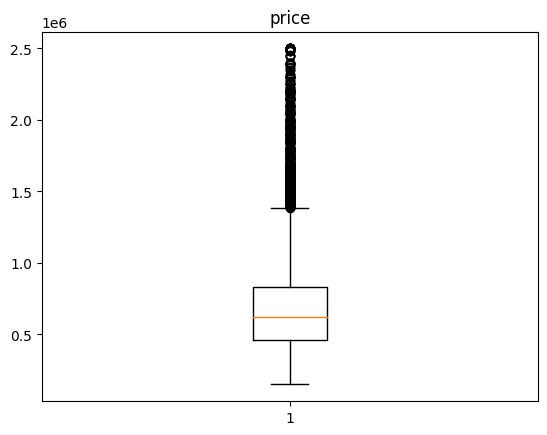

In [ ]:
price = data['price'].values
figure, axe = plt.subplots()
axe.set_title('price')
axe.boxplot(price)
plt.show()

In [ ]:
import numpy as np
quartile1 = np.percentile(data['price'],25)
quartile3 = np.percentile(data['price'],75)

equart = quartile3 - quartile1
limite_haute = quartile3 + (equart * 1.5)
limite_basse = quartile1 - (equart * 1.5)
print('limite basse {}  limite haute {}'.format(limite_basse, limite_haute))

limite basse -98000.0  limite haute 1386800.0


In [ ]:
haute_o = np.where(data['price']>limite_haute)
basse_o = np.where(data['price']<limite_basse)
data.drop(haute_o[0],inplace=True)
data.drop(basse_o[0],inplace=True)

In [ ]:
doublons = data[data.duplicated()]
print(doublons)

Empty DataFrame
Columns: [id, squareMeters, rooms, floor, floorCount, buildYear, latitude, longitude, centreDistance, poiCount, schoolDistance, clinicDistance, postOfficeDistance, kindergartenDistance, restaurantDistance, collegeDistance, pharmacyDistance, condition, hasParkingSpace, hasBalcony, hasElevator, hasSecurity, hasStorageRoom, price, point of interest, type_apartmentBuilding, type_blockOfFlats, type_tenement, type_unknown, city_bialystok, city_bydgoszcz, city_czestochowa, city_gdansk, city_gdynia, city_katowice, city_krakow, city_lodz, city_lublin, city_poznan, city_radom, city_rzeszow, city_szczecin, city_warszawa, city_wroclaw, ownership_condominium, ownership_cooperative, buildingMaterial_brick, buildingMaterial_concreteSlab, buildingMaterial_unknown]
Index: []

[0 rows x 49 columns]


In [ ]:
#740 échantillons ont été supprimés
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17946 entries, 0 to 18904
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             17946 non-null  int64  
 1   squareMeters                   17946 non-null  float64
 2   rooms                          17946 non-null  float64
 3   floor                          17946 non-null  float64
 4   floorCount                     17946 non-null  float64
 5   buildYear                      17946 non-null  float64
 6   latitude                       17946 non-null  float64
 7   longitude                      17946 non-null  float64
 8   centreDistance                 17946 non-null  float64
 9   poiCount                       17946 non-null  float64
 10  schoolDistance                 17946 non-null  float64
 11  clinicDistance                 17946 non-null  float64
 12  postOfficeDistance             17946 non-null  floa

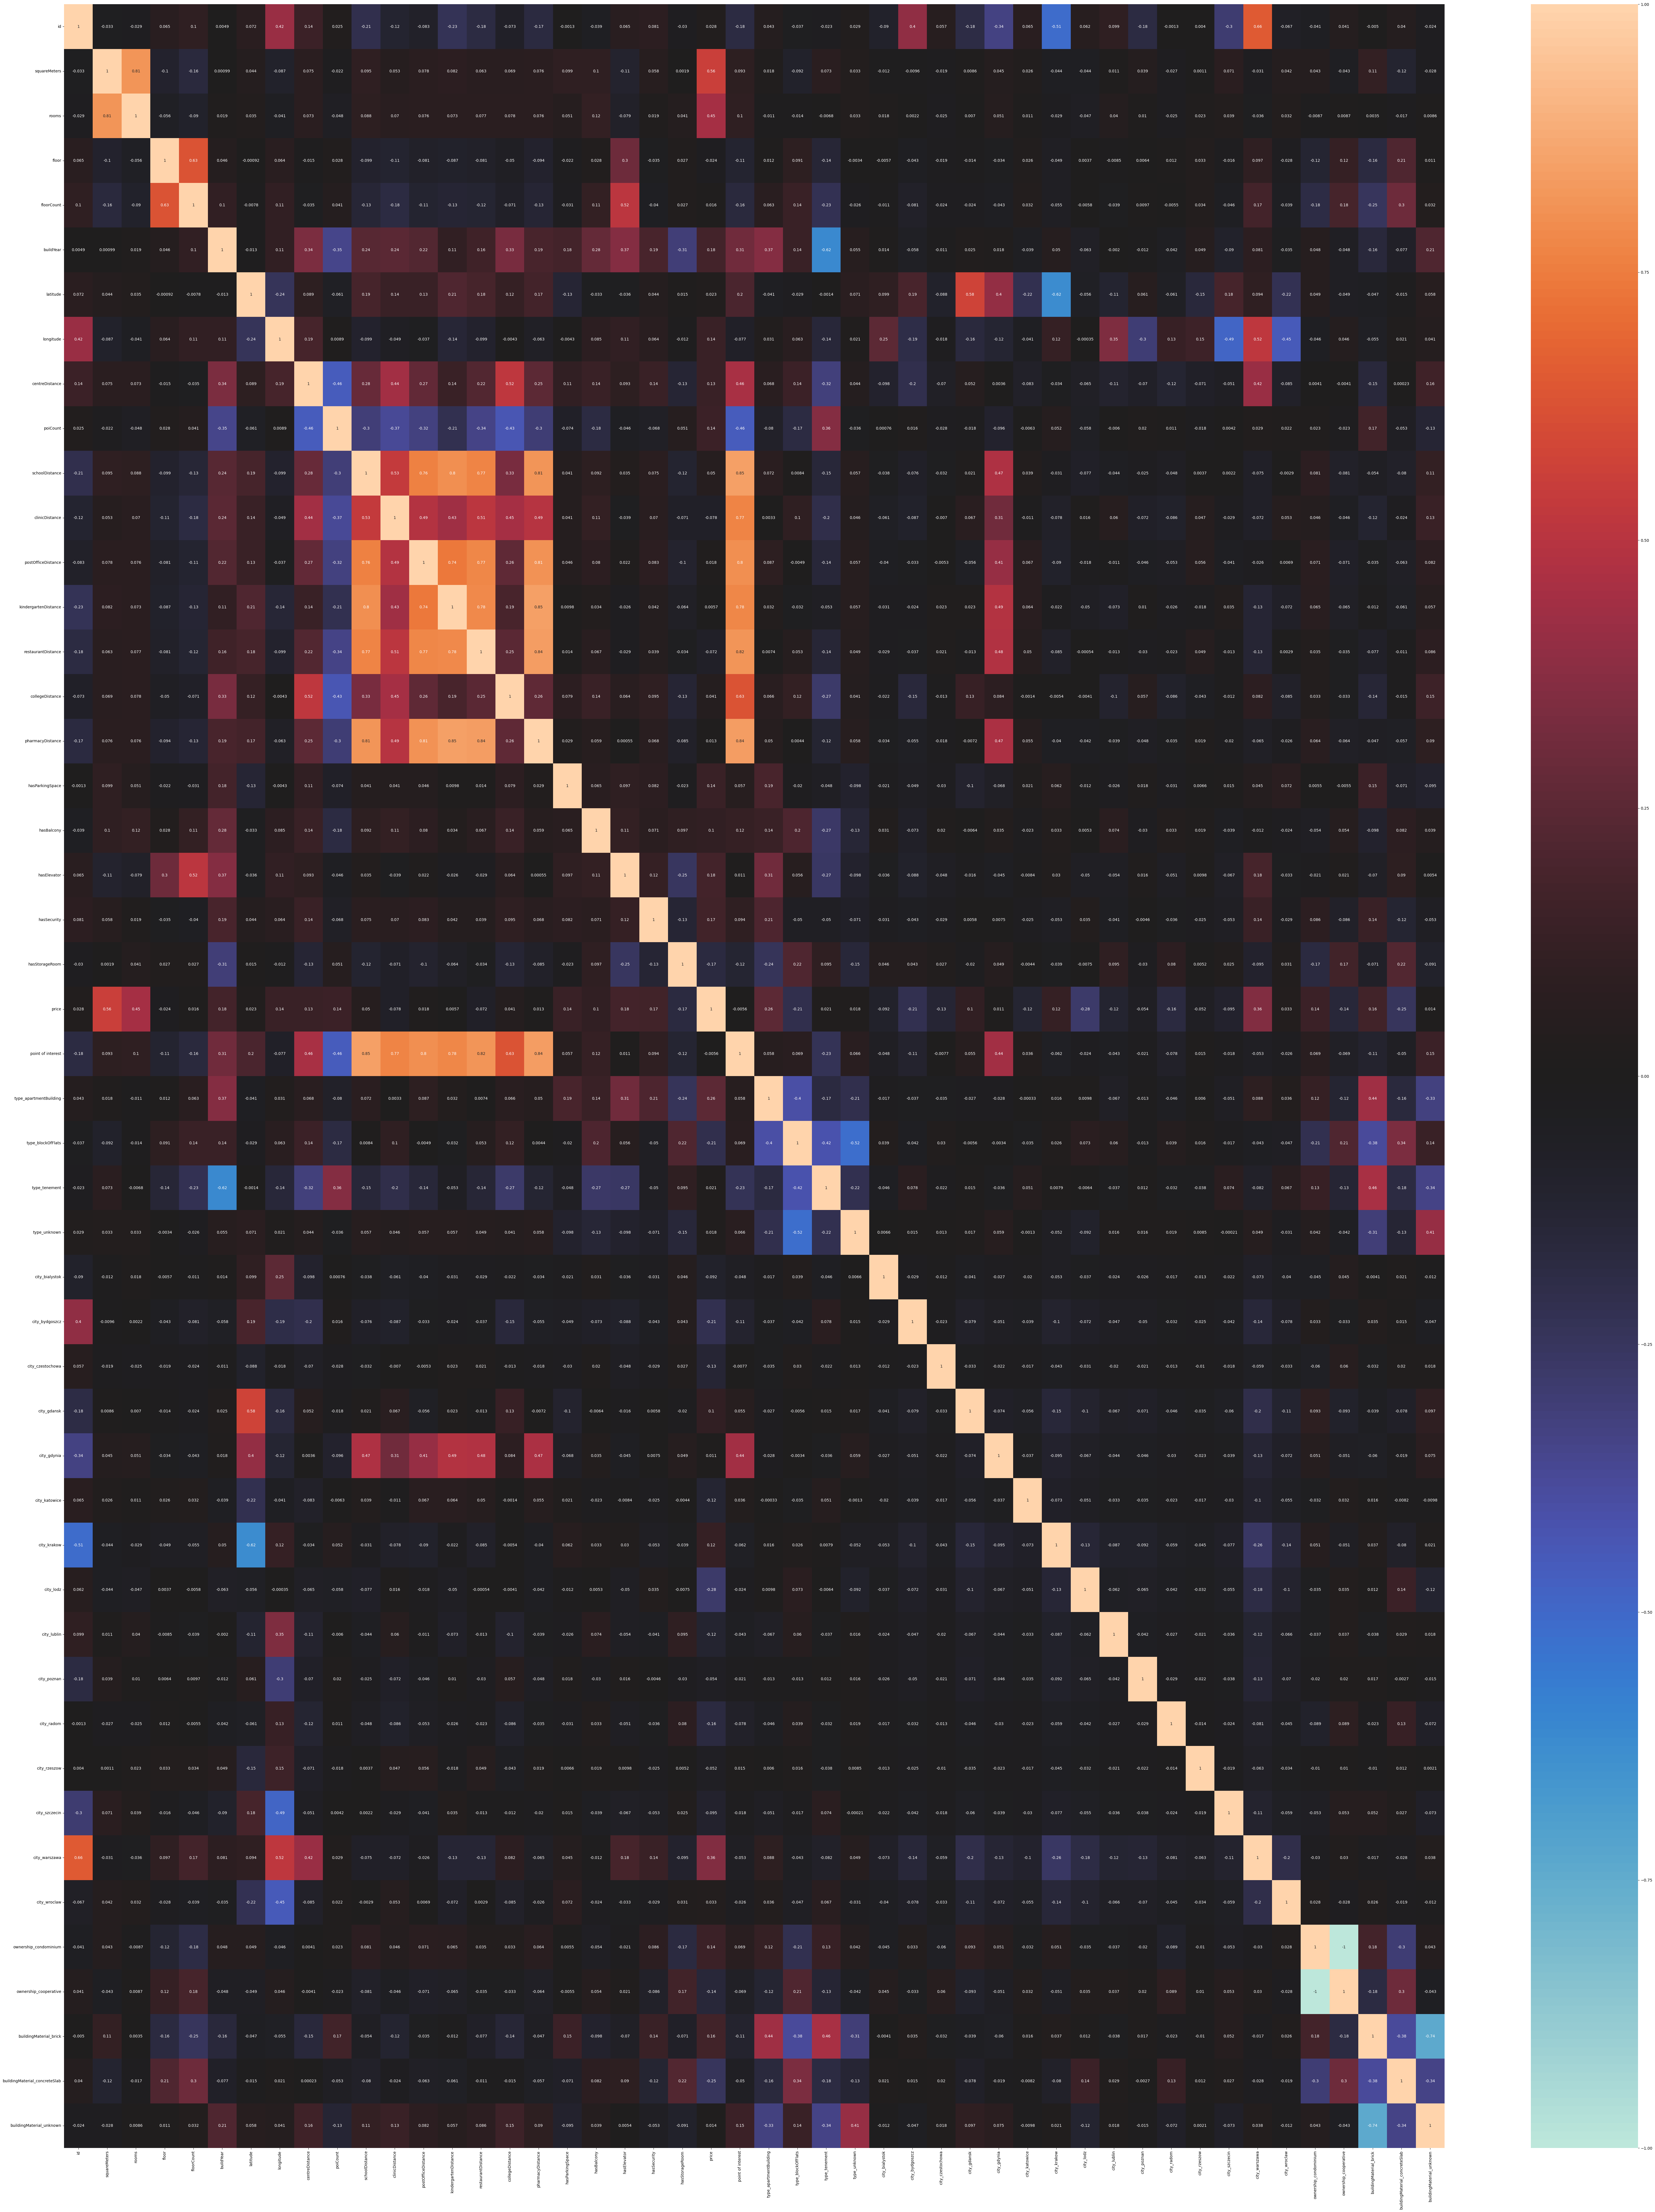

In [ ]:
matrice_corr = data.corr()
plt.figure(figsize=(80,100))
sns.heatmap(matrice_corr,annot=True,center=0)
plt.show()

In [ ]:
#machine learning
y=data['price'].values
x=data.drop(['price','id'],axis=1).values

In [ ]:
#standarisation
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
SC.fit(x)
x_scaled=SC.transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

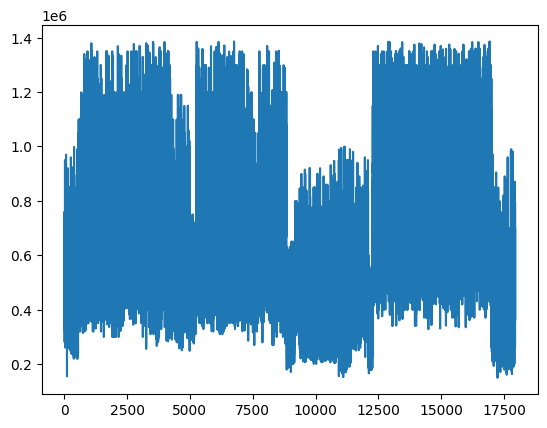

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(y)),y)
plt.show()

In [ ]:
#linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
regressor.score(xtrain,ytrain)

0.7479062024086522

In [ ]:
regressor.score(xtest,ytest)

0.7468399875604796

In [ ]:
y_pred = regressor.predict(xtrain)

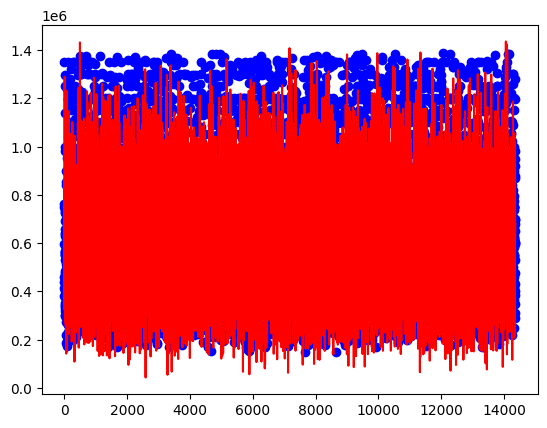

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(ytrain)),ytrain,'ob')
plt.plot(range(len(ytrain)),y_pred,'-r')
plt.show()

In [ ]:
#randomForestRegressor
from sklearn.ensemble import RandomForestRegressor
regressore = RandomForestRegressor(n_estimators=300,max_depth=20,min_samples_leaf=5,max_leaf_nodes=200)
regressore.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=20, max_leaf_nodes=200, min_samples_leaf=5,
                      n_estimators=300)

In [ ]:
regressore.score(xtrain,ytrain)

0.8701072434859347

In [ ]:
regressore.score(xtest,ytest)

0.8275696926511149

In [ ]:
from sklearn import linear_model
# Fit regression model
lassoReg = linear_model.Lasso()
lassoReg.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.161e+14, tolerance: 9.314e+10
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [ ]:
lassoReg.score(xtrain,ytrain)

0.7473068101134394

In [ ]:
lassoReg.score(xtest,ytest)

0.7461594626346568

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gradient = GradientBoostingRegressor()
gradient.fit(xtrain,ytrain)

GradientBoostingRegressor()

In [ ]:
gradient.score(xtrain,ytrain)

0.8165615573728416

In [ ]:
gradient.score(xtest,ytest)

0.8034881170215591

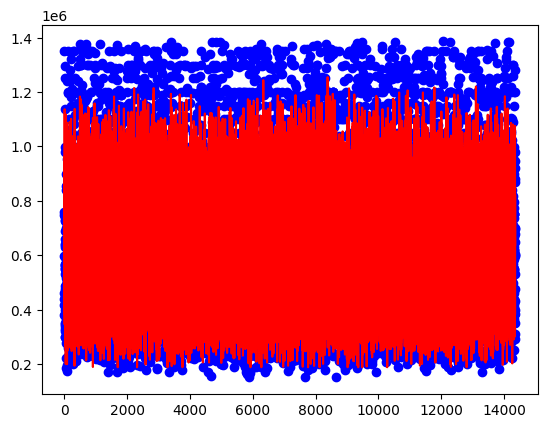

In [ ]:
prediction=gradient.predict(xtrain)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(ytrain)),ytrain,'ob')
plt.plot(range(len(ytrain)),prediction,'-r')
plt.show()